In [1]:
import time as time

import numpy as np
np.random.seed(40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

In [2]:
from PIL import Image
import time
from datetime import timedelta
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import skimage.morphology as morp
from skimage.filters import rank

In [3]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization 
from keras import regularizers 
from keras.optimizers import SGD
from keras.layers import Flatten, Conv2D, MaxPooling2D 
from keras.callbacks import ModelCheckpoint

In [4]:
import io
import pickle

# Loading and viewing of data

In [5]:
with open('../input/germantrafficsigns/train.p', mode='rb') as f:
    train = pickle.load(f)
with open('../input/germantrafficsigns/test.p', mode='rb') as f:
    test = pickle.load(f)
with open('../input/germantrafficsigns/valid.p', mode='rb') as f:
    valid = pickle.load(f)

In [6]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid , y_valid = valid['features'], valid['labels']

In [7]:
print("Training Set:", len(X_train))
print("Test Set:", len(y_test))
print("Validation Set:", len(X_valid))
print("Image Dimensions:", np.shape(X_train[1]))
print("Number of classes:", len(np.unique(y_train)))
n_classes = len(np.unique(y_train))

Training Set: 34799
Test Set: 12630
Validation Set: 4410
Image Dimensions: (32, 32, 3)
Number of classes: 43


[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42]
 [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
   690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
   480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
   210]]


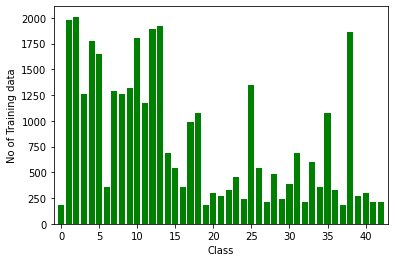

In [8]:
import matplotlib.pyplot as plt
import random

unique_elements, counts_elements = np.unique(y_train, return_counts = True)
print(np.asarray((unique_elements, counts_elements)))

plt.bar( np.arange( 43 ), counts_elements, align='center',color='green' )
plt.xlabel('Class')
plt.ylabel('No of Training data')
plt.xlim([-1, 43])

plt.show()

Traffic Sign Images


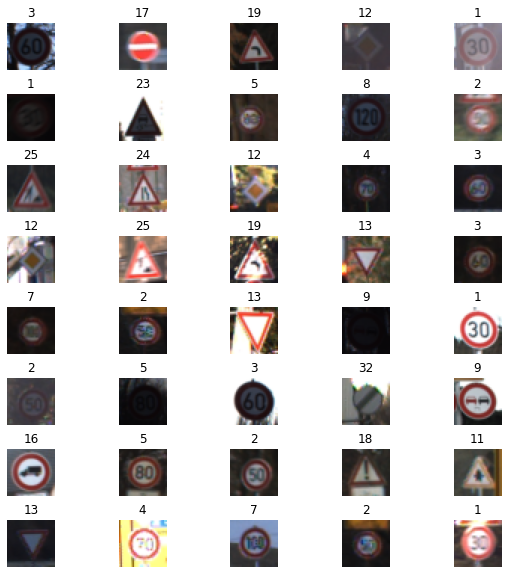

In [9]:
print("Traffic Sign Images")
fig, axs = plt.subplots(8,5, figsize=(10, 10))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(40):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

# Checking ready-made accuracy of given data

## Using DenseNet 

In [10]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(32*32*3,)))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(n_classes, activation='softmax'))

In [11]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               5

In [12]:
from keras.utils.np_utils import to_categorical

In [13]:
X_train_baseline = X_train.reshape(len(X_train), 32*32*3).astype('float32')
X_valid_baseline = X_valid.reshape(len(X_valid), 32*32*3).astype('float32')
y_train_baseline = to_categorical(y_train, n_classes)
y_valid_baseline = to_categorical(y_valid, n_classes)

In [14]:
model.fit(X_train_baseline, y_train_baseline, batch_size=128, epochs=100, verbose=1, validation_data=(X_valid_baseline, y_valid_baseline))

Epoch 1/100
272/272 [==============================] - 4s 8ms/step - loss: 2.8051 - accuracy: 0.2960 - val_loss: 1.3918 - val_accuracy: 0.6322
Epoch 2/100
272/272 [==============================] - 2s 6ms/step - loss: 0.8784 - accuracy: 0.7481 - val_loss: 1.0207 - val_accuracy: 0.6884
Epoch 3/100
272/272 [==============================] - 1s 5ms/step - loss: 0.5958 - accuracy: 0.8285 - val_loss: 0.9351 - val_accuracy: 0.7000
Epoch 4/100
272/272 [==============================] - 1s 5ms/step - loss: 0.5131 - accuracy: 0.8511 - val_loss: 1.3517 - val_accuracy: 0.6551
Epoch 5/100
272/272 [==============================] - 1s 5ms/step - loss: 0.4223 - accuracy: 0.8784 - val_loss: 0.7500 - val_accuracy: 0.7649
Epoch 6/100
272/272 [==============================] - 1s 5ms/step - loss: 0.3725 - accuracy: 0.8904 - val_loss: 1.0226 - val_accuracy: 0.7315
Epoch 7/100
272/272 [==============================] - 1s 5ms/step - loss: 0.3128 - accuracy: 0.9088 - val_loss: 0.7176 - val_accuracy: 0.8014

In [15]:
X_test_baseline = X_test.reshape(len(X_test), 32*32*3).astype('float32')
y_test_baseline = to_categorical(y_test, n_classes)

Pred = model.evaluate(X_test_baseline, y_test_baseline, verbose=0)
print("Dense fully connected network results on the test data - Baseline ")
print(" ")
print("%s- %.2f" % (model.metrics_names[0], Pred[0]))
print("%s- %.2f" % (model.metrics_names[1], Pred[1]))

Dense fully connected network results on the test data - Baseline 
 
loss- 8.94
accuracy- 0.87


# Image Preprocessing

In [16]:
import cv2

In [17]:
def data_augment(image):
    rows= image.shape[0]
    cols = image.shape[1]
    
    # rotation
    M_rot = cv2.getRotationMatrix2D((cols/2,rows/2),10,1)
    
    # Translation
    M_trans = np.float32([[1,0,3],[0,1,6]])
    
    
    img = cv2.warpAffine(image,M_rot,(cols,rows))
    img = cv2.warpAffine(img,M_trans,(cols,rows))
    
    
    # Bilateral filtering
    img = cv2.bilateralFilter(img,9,75,75)
    return img

In [18]:
classes = 43

X_train_final = X_train
y_train_final = y_train
X_aug_1 = []
Y_aug_1 = []

for i in range(0,classes):
    
    class_records = np.where(y_train==i)[0].size
    max_records = 4000
    if class_records != max_records:
        ovr_sample = max_records - class_records
        samples = X_train[np.where(y_train==i)[0]]
        X_aug = []
        Y_aug = [i] * ovr_sample
        
        for x in range(ovr_sample):
            img = samples[x % class_records]
            trans_img = data_augment(img)
            X_aug.append(trans_img)
            
        X_train_final = np.concatenate((X_train_final, X_aug), axis=0)
        y_train_final = np.concatenate((y_train_final, Y_aug)) 
        
        Y_aug_1 = Y_aug_1 + Y_aug
        X_aug_1 = X_aug_1 + X_aug

[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42]
 [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  4000]]


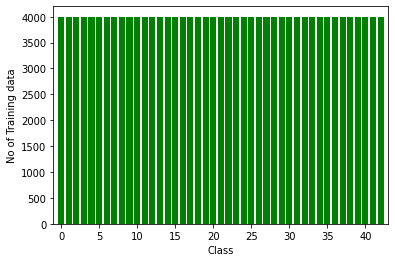

In [19]:
unique_elements, counts_elements = np.unique(y_train_final, return_counts = True)
print(np.asarray((unique_elements, counts_elements)))

pyplot.bar( np.arange( 43 ), counts_elements, align='center',color='green' )
pyplot.xlabel('Class')
pyplot.ylabel('No of Training data')
pyplot.xlim([-1, 43])

pyplot.show()

In [20]:
print(len(X_train))
print(len(X_train_final))
print(len(y_train))
print(len(y_train_final))

34799
172000
34799
172000


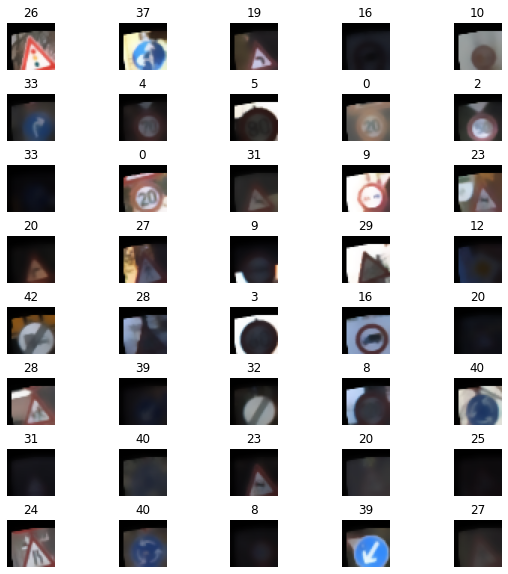

In [21]:
fig, axs = plt.subplots(8,5, figsize=(10, 10))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(40):
    index = random.randint(0, len(X_aug_1))
    image = X_aug_1[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(Y_aug_1[index])

# Model Implementation 1 - ResNet50

In [22]:
from keras.applications.resnet50 import ResNet50

In [23]:
model_resnet=Sequential()

model_resnet.add(ResNet50(include_top=False, weights='imagenet',input_shape=(32,32,3)))
model_resnet.add(Flatten())
model_resnet.add(BatchNormalization())
model_resnet.add(Dense(256,activation='relu'))
model_resnet.add(Dropout(0.5))
model_resnet.add(BatchNormalization())
model_resnet.add(Dense(128,activation='relu'))
model_resnet.add(Dropout(0.5))
model_resnet.add(BatchNormalization())
model_resnet.add(Dense(64,activation='relu'))
model_resnet.add(Dropout(0.5))
model_resnet.add(BatchNormalization())
model_resnet.add(Dense(n_classes,activation='softmax'))

94773248/94765736 [==============================] - 0s 0us/step


In [24]:
model_resnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
X_train_resnet = X_train_final.reshape(len(X_train_final), 32,32,3).astype('float32')
X_valid_resnet = X_valid.reshape(len(X_valid), 32,32,3).astype('float32')
X_test_resnet = X_test.reshape(len(X_test), 32,32,3).astype('float32')

In [26]:
y_train_final_resnet = to_categorical(y_train_final, n_classes)
y_valid_final_resnet = to_categorical(y_valid, n_classes)
y_test_final_resnet = to_categorical(y_test, n_classes)

In [27]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [28]:
model_resnet.fit(X_train_resnet, y_train_final_resnet, batch_size=128, epochs=100, verbose=1,validation_data=(X_valid_resnet, y_valid_final_resnet))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/100
1344/1344 [==============================] - 225s 164ms/step - loss: 3.1363 - accuracy: 0.1362 - val_loss: 1.8539 - val_accuracy: 0.3753
Epoch 2/100
1344/1344 [==============================] - 221s 164ms/step - loss: 1.1472 - accuracy: 0.5454 - val_loss: 1.5303 - val_accuracy: 0.5789
Epoch 3/100
1344/1344 [==============================] - 220s 164ms/step - loss: 0.6554 - accuracy: 0.7386 - val_loss: 1.6686 - val_accuracy: 0.7440
Epoch 4/100
1344/1344 [==============================] - 219s 163ms/step - loss: 0.4332 - accuracy: 0.8570 - val_loss: 0.7883 - val_accuracy: 0.7980
Epoch 5/100
1344/1344 [==============================] - 219s 163ms/step - loss: 0.2952 - accuracy: 0.9178 - val_loss: 0.9110 - val_accuracy: 0.7778
Epoch 6/100
1344/1344 [==============================] - 220s 164ms/step - loss: 0.2406 - accuracy: 0.9324 - val_loss: 0.5903 - val_accuracy: 0.8791
Epoch 7/100
1344/1344 [==============================] - 218s 162ms/step - loss: 0.2099 - accuracy: 0.9436

In [29]:
Pred = model_resnet.evaluate(X_test_resnet, y_test_final_resnet, verbose=0)
print("Resnet model results on the test data")
print(" ")
print("%s- %.2f" % (model_resnet.metrics_names[0], Pred[0]))
print("%s- %.2f" % (model_resnet.metrics_names[1], Pred[1]))

Resnet model results on the test data
 
loss- 0.71
accuracy- 0.95


## Further image preprocessing

In [30]:
def gray_scale(image):
    
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

gray_images_data = list(map(gray_scale, X_train_final))

def local_histo_equalize(image):
    
    kernel = morp.disk(30)
    img_local = rank.equalize(image, selem=kernel)
    return img_local


local_histo = np.array(list(map(local_histo_equalize, gray_images_data)))

In [31]:
def preprocess(data):
    gray_images = list(map(gray_scale, data))
    equalized_images = list(map(local_histo_equalize, gray_images))
    n_training = data.shape
    normalized_images = np.zeros((n_training[0], n_training[1], n_training[2]))
    for i, img in enumerate(equalized_images):
        normalized_images[i] = np.divide(img,255)
    normalized_images = normalized_images[..., None]
    return normalized_images

In [32]:
X_train_preprocessed = preprocess(X_train_final)
X_valid_preprocessed = preprocess(X_valid)
X_test_preprocessed = preprocess(X_test)

# Model Implementation 2 - CNN

In [33]:
X_train_preprocessed_cn = X_train_preprocessed.reshape(len(X_train_preprocessed), 32,32,1).astype('float32')
X_valid_preprocessed_cn = X_valid_preprocessed.reshape(len(X_valid_preprocessed), 32,32,1).astype('float32')
X_test_preprocessed_cn = X_test_preprocessed.reshape(len(X_test_preprocessed), 32,32,1).astype('float32')

In [34]:
y_train_final_cn = to_categorical(y_train_final, n_classes)
y_valid_final_cn = to_categorical(y_valid, n_classes)
y_test_final_cn = to_categorical(y_test, n_classes)

In [35]:
model_conv = Sequential()

model_conv.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(32, 32, 1)))
model_conv.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model_conv.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model_conv.add(Dropout(0.25))
model_conv.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model_conv.add(Dropout(0.5))
model_conv.add(Flatten())
model_conv.add(Dense(128, activation='relu'))
model_conv.add(Dropout(0.5))
model_conv.add(Dense(n_classes, activation='softmax'))

In [36]:
model_conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model_conv.fit(X_train_preprocessed_cn, y_train_final_cn, batch_size=128, epochs=100, verbose=1,validation_data=(X_valid_preprocessed_cn, y_valid_final_cn))

Epoch 1/100
1344/1344 [==============================] - 28s 20ms/step - loss: 2.4299 - accuracy: 0.3353 - val_loss: 0.2768 - val_accuracy: 0.9254
Epoch 2/100
1344/1344 [==============================] - 27s 20ms/step - loss: 0.4384 - accuracy: 0.8624 - val_loss: 0.1161 - val_accuracy: 0.9714
Epoch 3/100
1344/1344 [==============================] - 27s 20ms/step - loss: 0.2791 - accuracy: 0.9145 - val_loss: 0.0938 - val_accuracy: 0.9748
Epoch 4/100
1344/1344 [==============================] - 27s 20ms/step - loss: 0.2059 - accuracy: 0.9362 - val_loss: 0.0641 - val_accuracy: 0.9830
Epoch 5/100
1344/1344 [==============================] - 27s 20ms/step - loss: 0.1714 - accuracy: 0.9470 - val_loss: 0.0876 - val_accuracy: 0.9796
Epoch 6/100
1344/1344 [==============================] - 27s 20ms/step - loss: 0.1501 - accuracy: 0.9534 - val_loss: 0.0631 - val_accuracy: 0.9841
Epoch 7/100
1344/1344 [==============================] - 27s 20ms/step - loss: 0.1371 - accuracy: 0.9579 - val_loss: 0

In [38]:
Pred_conv = model_conv.evaluate(X_test_preprocessed_cn, y_test_final_cn, verbose=0)
print("Dense fully connected network(CNN) results on the test data")
print(" ")
print("%s- %.2f" % (model.metrics_names[0], Pred_conv[0]))
print("%s- %.2f" % (model.metrics_names[1], Pred_conv[1]))

Dense fully connected network(CNN) results on the test data
 
loss- 0.11
accuracy- 0.98
